<a href="https://colab.research.google.com/github/avladova/Student-performance-prediction/blob/main/MLSD24_Student_performance_Vladova%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import random
#import string

from sklearn.preprocessing import FunctionTransformer
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, roc_auc_score
from scipy import stats

from itertools import combinations
#%pylab inline

In [2]:
url = 'https://raw.githubusercontent.com/avladova/Student-performance-prediction/main/merged.csv'
merged = pd.read_csv(url)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Пол                 84 non-null     object 
 1   Группа              84 non-null     int64  
 2   ДЗ 1                84 non-null     float64
 3   Программирование 1  50 non-null     float64
 4   Активность 1        84 non-null     float64
 5   Контрольная 1       84 non-null     float64
 6   Проект 1            84 non-null     float64
 7   Доп.задание 1       50 non-null     float64
 8   Аттестация 1        84 non-null     int64  
 9   ДЗ 2                50 non-null     float64
 10  Программирование 2  50 non-null     float64
 11  Активность 2        84 non-null     float64
 12  Контрольная 2       84 non-null     int64  
 13  Доп.задание 2       84 non-null     int64  
 14  ДЗ вне срока        50 non-null     float64
 15  Аттестация 2        84 non-null     int64  
 16  Экзамен   

In [3]:
merged.fillna(0, inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Пол                 84 non-null     object 
 1   Группа              84 non-null     int64  
 2   ДЗ 1                84 non-null     float64
 3   Программирование 1  84 non-null     float64
 4   Активность 1        84 non-null     float64
 5   Контрольная 1       84 non-null     float64
 6   Проект 1            84 non-null     float64
 7   Доп.задание 1       84 non-null     float64
 8   Аттестация 1        84 non-null     int64  
 9   ДЗ 2                84 non-null     float64
 10  Программирование 2  84 non-null     float64
 11  Активность 2        84 non-null     float64
 12  Контрольная 2       84 non-null     int64  
 13  Доп.задание 2       84 non-null     int64  
 14  ДЗ вне срока        84 non-null     float64
 15  Аттестация 2        84 non-null     int64  
 16  Экзамен   

# Преобразование во временной ряд

In [4]:
df_merged=merged.drop(columns=['Пол','Группа']).copy()
quantitative_data = df_merged.select_dtypes(include=['int64', 'float64'])
# Создаем словарь для переименования признаков
feature_mapping = {
    'Активность 1': 1,
    'Программирование 1': 2,
    'ДЗ 1': 3,
    'Контрольная 1': 4,
    'Доп.задание 1': 5,
    'Проект 1': 6,
    'Аттестация 1': 7,
    'Активность 2': 8,
    'Программирование 2': 9,
    'ДЗ 2': 10,
    'Контрольная 2': 11,
    'Доп.задание 2': 12,
    'ДЗ вне срока': 13,
    'Аттестация 2': 14,
    'Экзамен': 15,
    'Итог': 16,
    'Пересдача': 17
}

# Применяем словарь
whiskers_data = df_merged.rename(columns=feature_mapping).set_index('Индекс').sort_index(axis=1)
whiskers_data.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Индекс,,,,,,,,,,,,,,,,,
ВДm5,2.0,0.0,13.5,4.5,0.0,4.0,17,3.0,3.0,12.65,4,0,5.400,20,55,92,0.0
ВКf5,0.0,0.0,10.0,0.0,0.0,0.0,8,0.0,0.0,10.20,4,0,3.285,12,60,80,0.0
ГАf5,0.0,0.0,7.3,1.0,0.0,0.0,8,0.0,0.0,3.23,1,0,2.499,5,25,38,0.0


In [5]:
scaler = MinMaxScaler(feature_range = (0, 1))
# Fit and transform the dataframe using the scaler
whiskers_normalized_values = scaler.fit_transform(whiskers_data)
whiskers_normalized = pd.DataFrame(whiskers_normalized_values, columns=whiskers_data.columns, index=whiskers_data.index)
whiskers_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, ВДm5 to ЧКf6
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       84 non-null     float64
 1   2       84 non-null     float64
 2   3       84 non-null     float64
 3   4       84 non-null     float64
 4   5       84 non-null     float64
 5   6       84 non-null     float64
 6   7       84 non-null     float64
 7   8       84 non-null     float64
 8   9       84 non-null     float64
 9   10      84 non-null     float64
 10  11      84 non-null     float64
 11  12      84 non-null     float64
 12  13      84 non-null     float64
 13  14      84 non-null     float64
 14  15      84 non-null     float64
 15  16      84 non-null     float64
 16  17      84 non-null     float64
dtypes: float64(17)
memory usage: 11.8+ KB


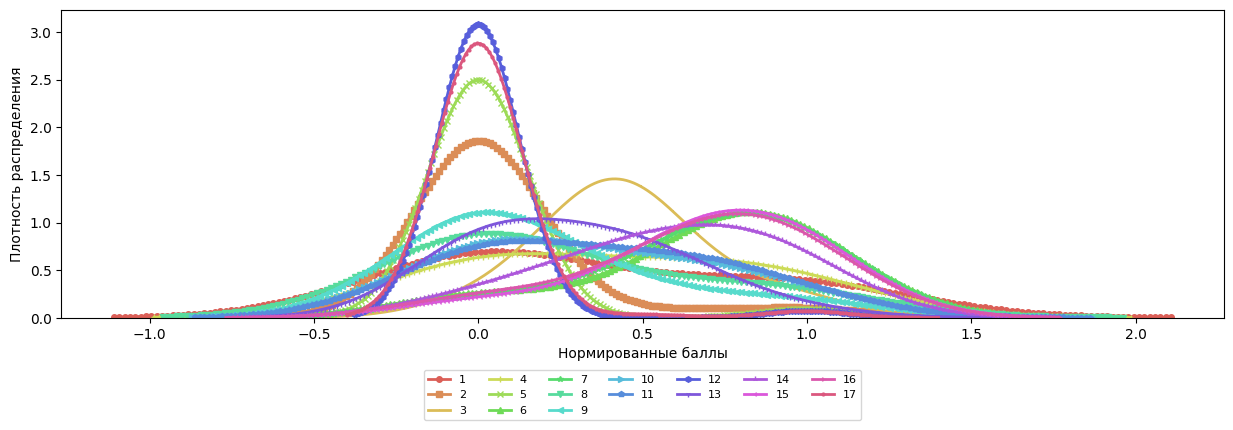

In [6]:
cols=whiskers_normalized.columns
markers = ['o', 's', ',', '+', 'x', '^', '*', 'v', '<', '>', 'p', 'h', '1', '2', '3', '4', '.']  # список различных маркеров
colors = sns.color_palette('hls', len(cols))
plt.figure(figsize=(15, 4))
# Построение гистограммы для каждого признака с добавлением меток колонок в легенду
for i, col in enumerate(cols):
    sns.kdeplot(data=whiskers_normalized[col], label=col, bw_adjust=2, linewidth=2, fill=False, marker=markers[i], markersize=4,
                color=colors[i])
#plt.xlim(0.0, 1.0)  # Set the lower limit of the x-axis to 0
plt.legend(loc='lower center', ncols=7, fontsize=8, bbox_to_anchor=(0.5, -0.35))
plt.xlabel('Нормированные баллы')
plt.ylabel('Плотность распределения')
plt.show()

# Прогноз

## Прогноз по нормализованным данным

In [7]:
def linear_regression_model(X_train, X_test, y_train, y_test):
    # Обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Оценка качества модели
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R squared: {r_squared}')

    # Составление DataFrame с фактическими и предсказанными оценками
    predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    # Построение графиков прогнозов с regplot для каждого студента
    for student_index in X_test.index:
        actual_scores = X_test.loc[student_index].values
        actual_score = predictions.loc[student_index, 'Actual']
        predicted_score = predictions.loc[student_index, 'Predicted']

        plt.figure(figsize=(6,3))

        ax = sns.regplot(x=X_train.columns, y=actual_scores, fit_reg=False, label='Текущие оценки')
        ax.scatter(15, actual_score, color='green', label='Итоговая оценка', marker='s')
        ax.scatter(15, predicted_score, color='red', label='Прогноз итога', marker='s')
        plt.title(f'Студент {student_index} - Реальные и Прогнозная оценки')
        plt.xlabel('Время, недели')
        plt.ylabel('Нормированные баллы')
        plt.legend()
        plt.show()

Mean Absolute Error: 0.07259394521402648
Mean Squared Error: 0.009330319674367508
Root Mean Squared Error: 0.09659357988172665
R squared: 0.9087003410997349


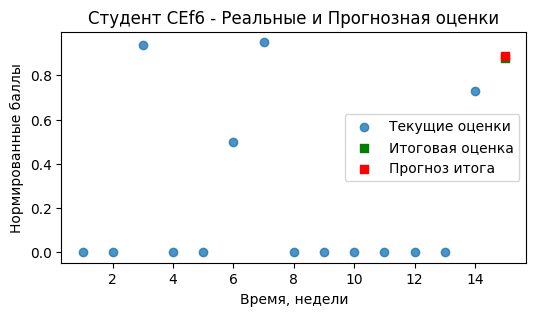

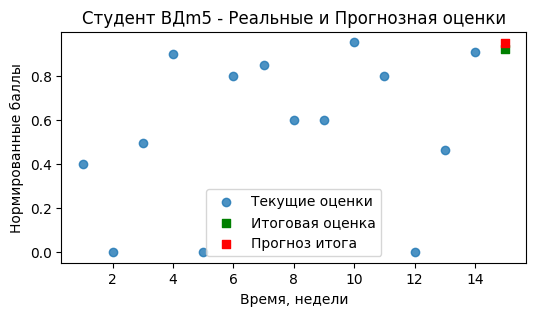

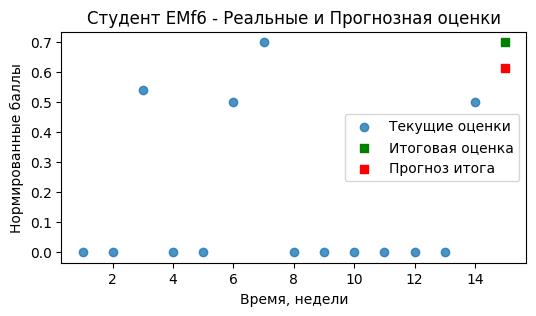

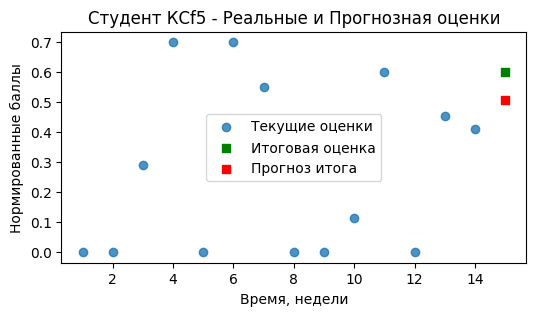

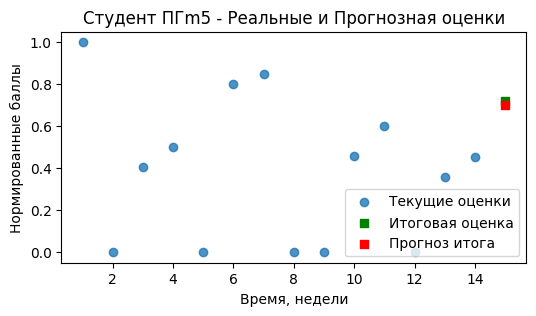

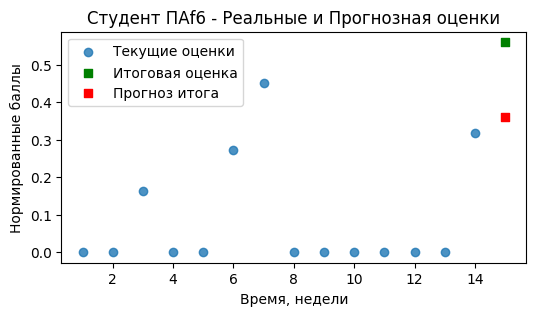

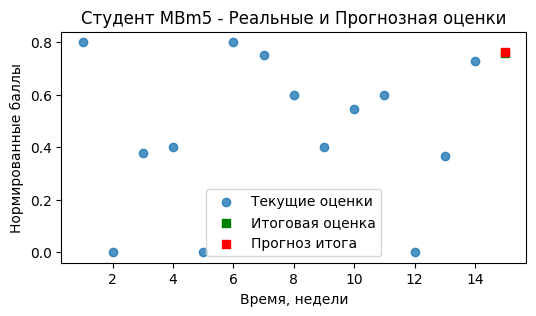

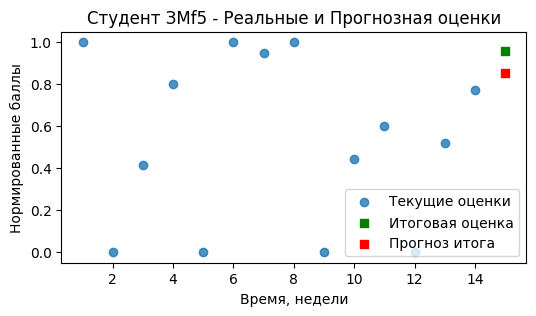

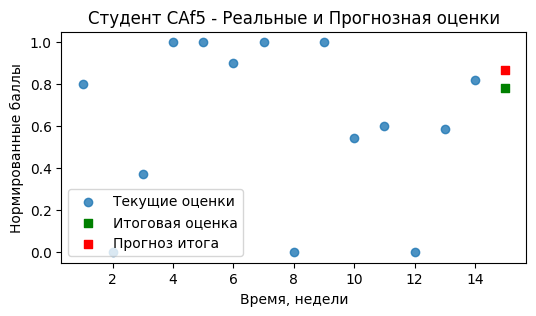

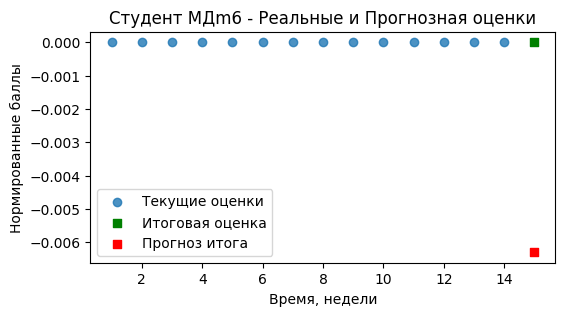

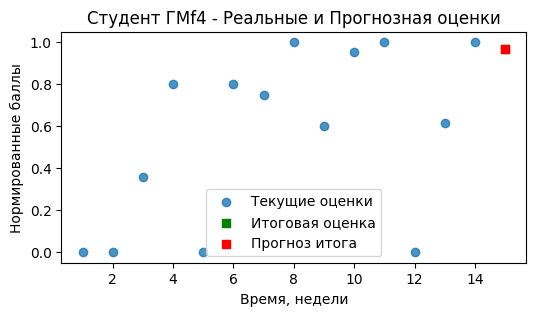

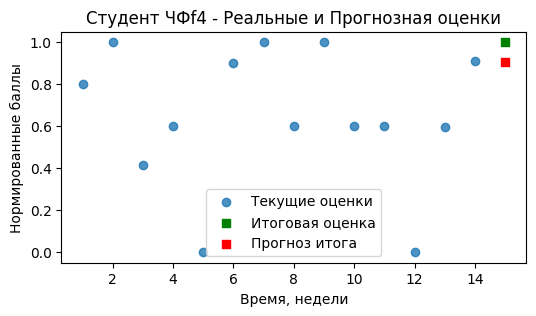

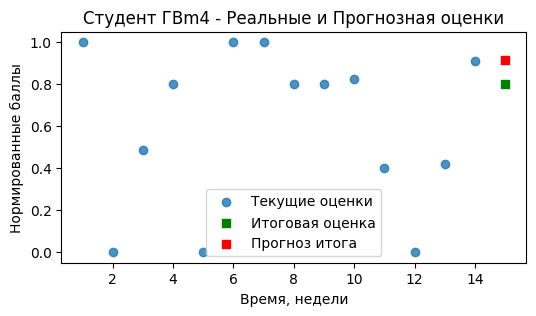

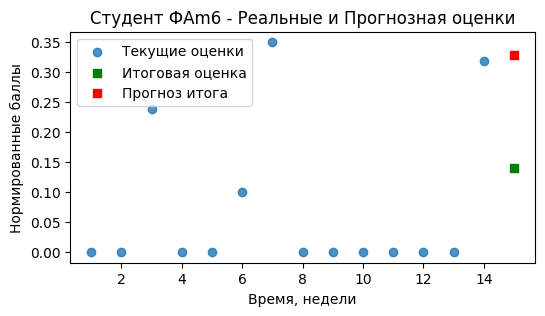

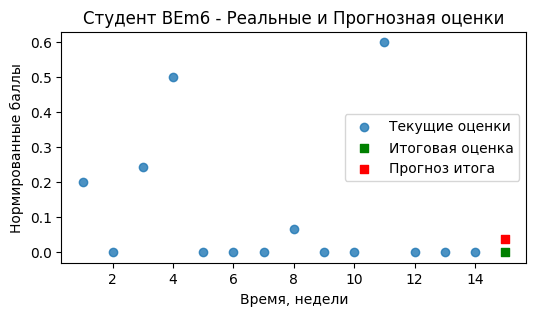

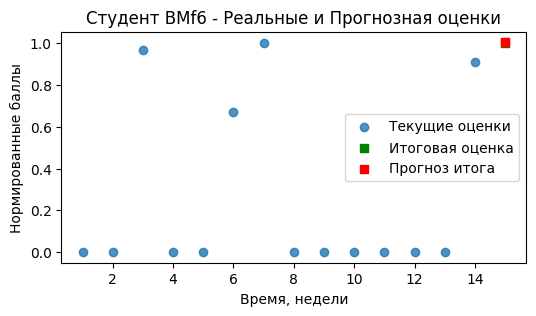

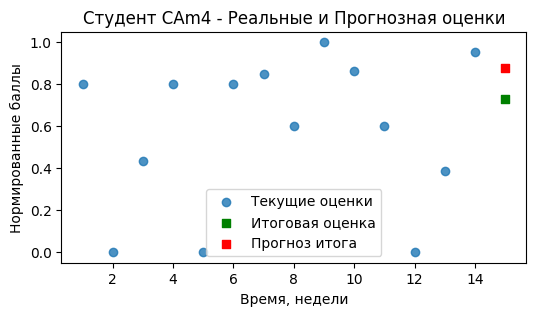

In [8]:
whiskers_normalized = whiskers_normalized.astype(float)

# Разделение данных на обучающий и целевой наборы
X = whiskers_normalized.iloc[:, :14]  # данные с оценками от 1 до 15
y = whiskers_normalized.iloc[:, 15]  # оценки в столбце 16

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regression_model(X_train, X_test, y_train, y_test)

## Зашумление X_train, X_test

Mean Absolute Error: 0.08682918971827312
Mean Squared Error: 0.009339948763213136
Root Mean Squared Error: 0.09664341034552297
R squared: 0.9086061179050526


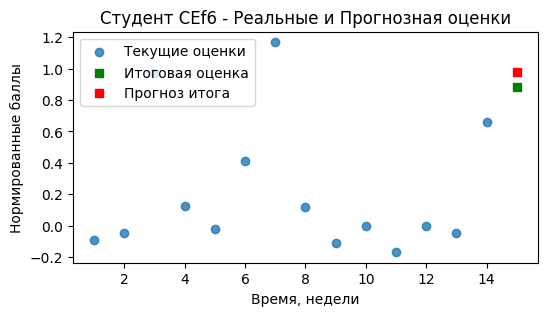

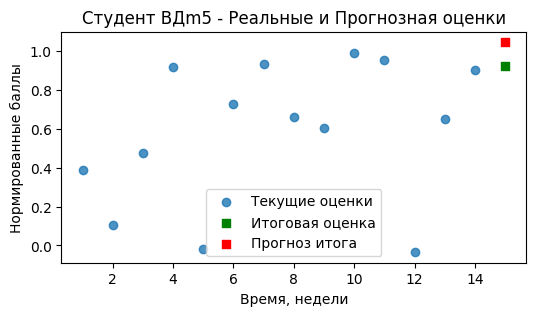

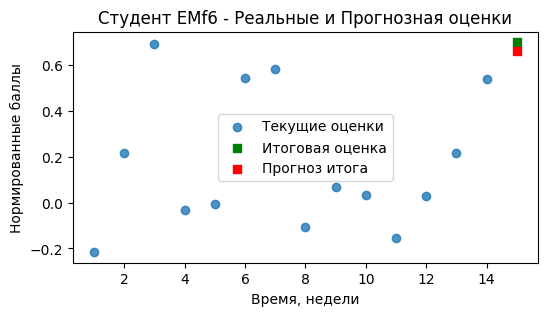

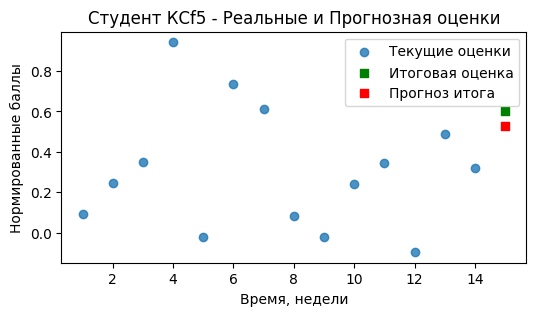

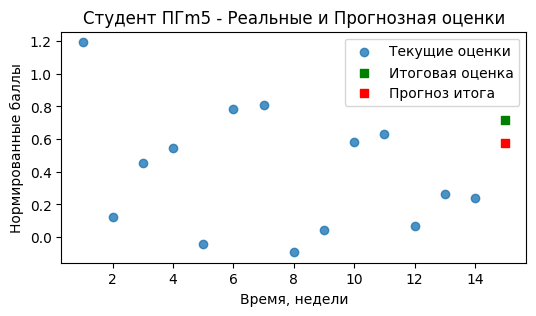

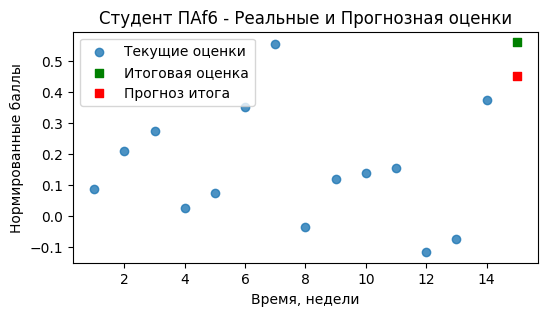

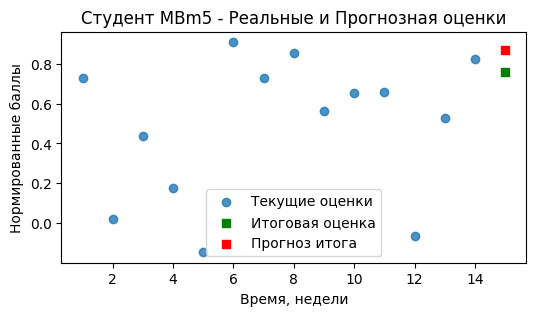

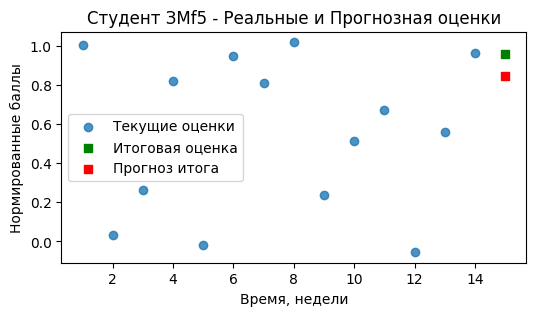

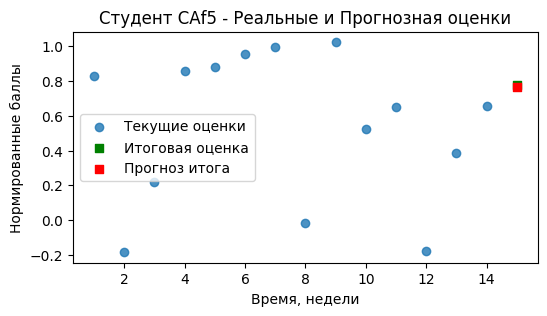

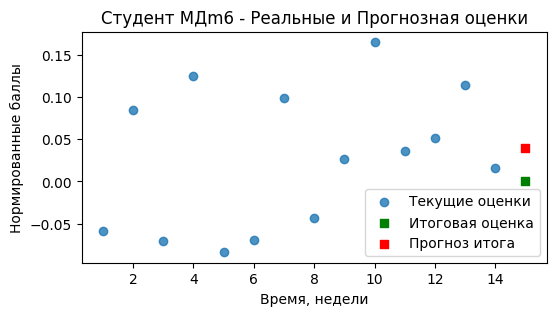

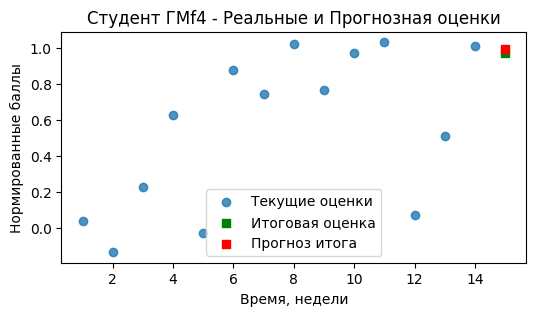

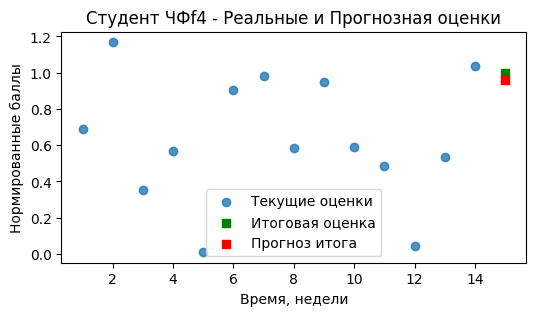

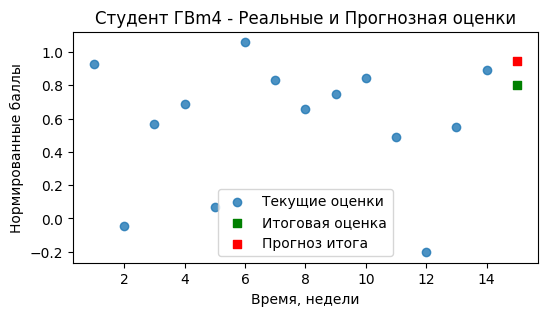

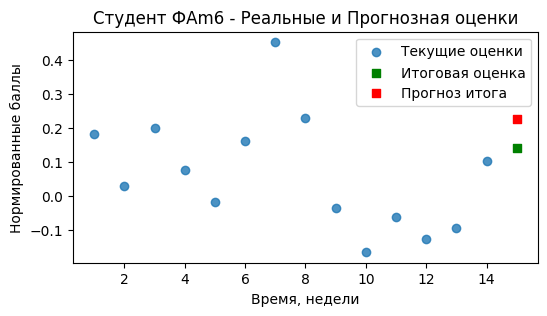

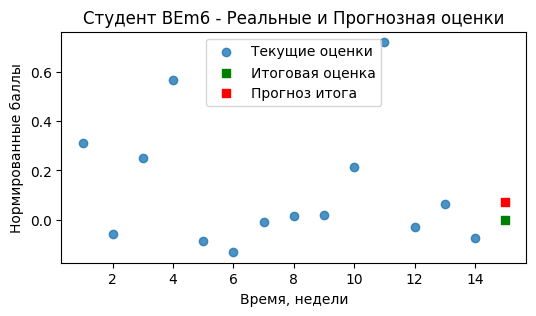

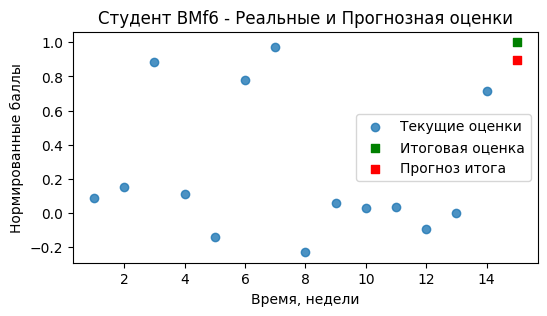

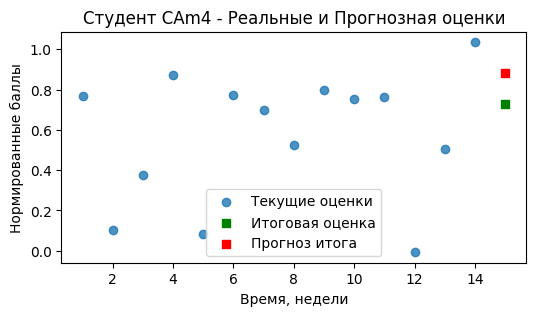

In [9]:
def add_noise(X):
    noise = np.random.normal(0, 0.1, X.shape)  # Generate random noise
    return X + noise
noisy_transformer = FunctionTransformer(add_noise)
X_train_noisy = noisy_transformer.transform(X_train)
X_test_noisy = noisy_transformer.transform(X_test)

linear_regression_model(X_train_noisy, X_test_noisy, y_train, y_test)

## Генерация новых данных

In [10]:
# Функция для генерации значения признака "Индекс"
def generate_indices(count):
    indices = []
    for _ in range(count):
        # Выбор случайных букв из русского алфавита
        first_letter = chr(random.randint(1040, 1071))  # Символы 'А' - 'Я' в кодировке Unicode
        second_letter = chr(random.randint(1040, 1071))

        # Выбор случайно 'm' или 'f'
        gender = random.choice(['m', 'f'])

        # Выбор случайной цифры от 1 до 9
        number = random.randint(1, 9)

        # Формирование значения признака "Индекс"
        index = f"{first_letter}{second_letter}{gender}{number}"

        # Добавление сгенерированного значения в список
        indices.append(index)

    return indices

In [11]:
whiskers_unindex=whiskers_normalized.reset_index().copy()
numerical_columns = whiskers_unindex.select_dtypes(include=['int64', 'float64']).columns

# Предобработка данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(whiskers_unindex[numerical_columns])

# Обучение модели Gaussian Mixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(whiskers_unindex[numerical_columns])

# Генерация новых синтетических записей
num_new_records = 5
new_records, _ = gmm.sample(num_new_records)
generated_data = scaler.inverse_transform(new_records)

# Создание нового DataFrame с синтетическими записями
new_records_df = pd.DataFrame(generated_data, columns=numerical_columns)
new_records_df['Индекс']=generate_indices(num_new_records)

# Добавление сгенерированных записей к исходному DataFrame
extended_df = pd.concat([whiskers_unindex, new_records_df], ignore_index=True).set_index('Индекс')

Mean Absolute Error: 0.06971114167281746
Mean Squared Error: 0.009003457360739544
Root Mean Squared Error: 0.0948865499464468
R squared: 0.8595275956526323


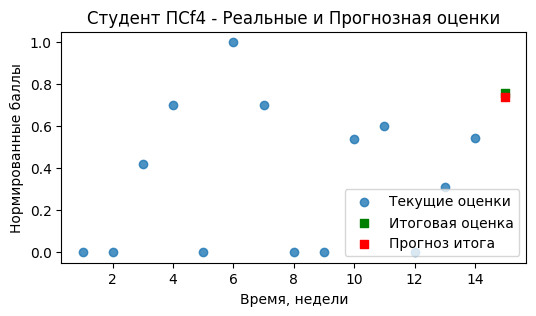

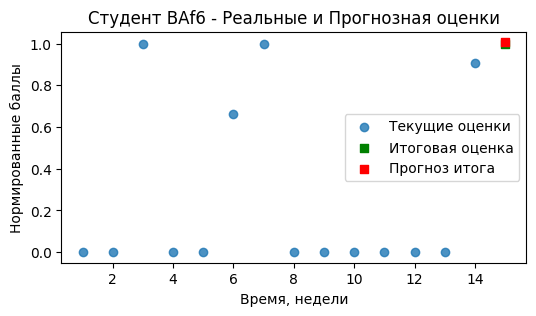

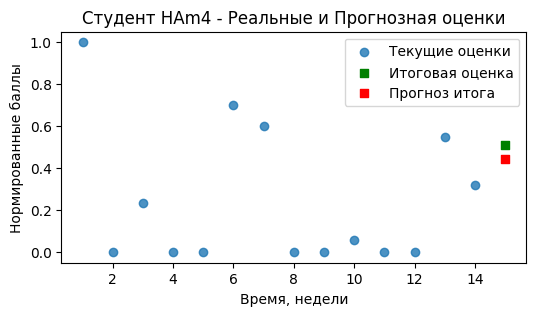

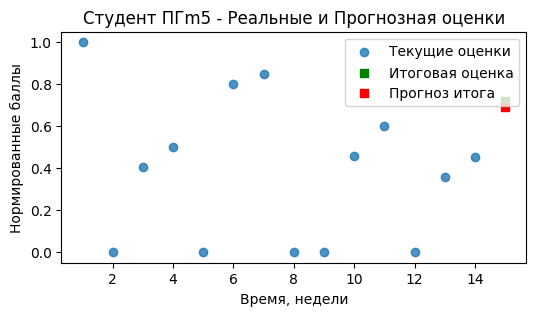

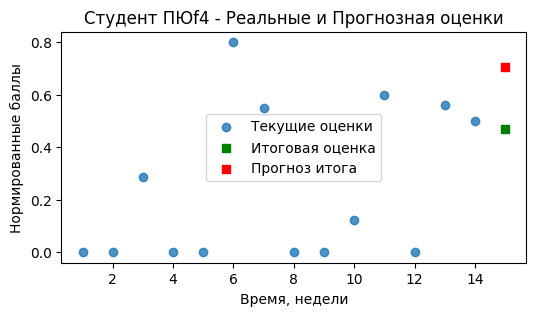

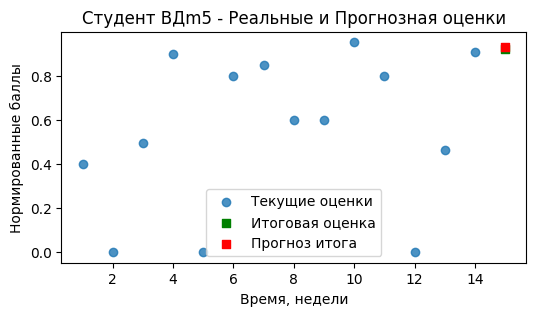

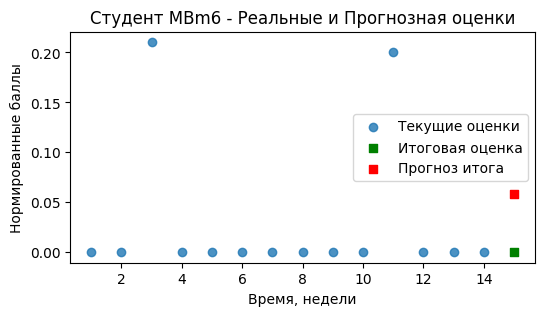

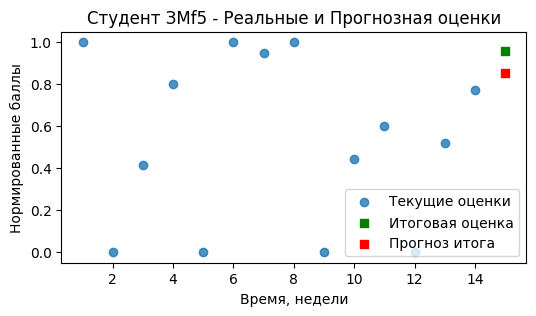

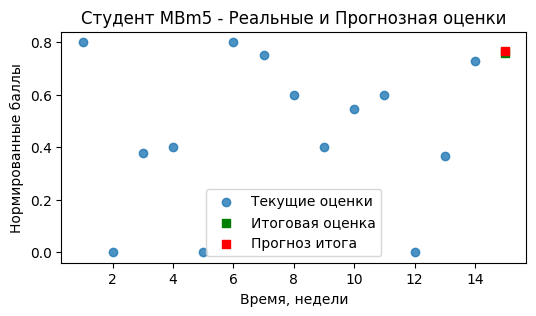

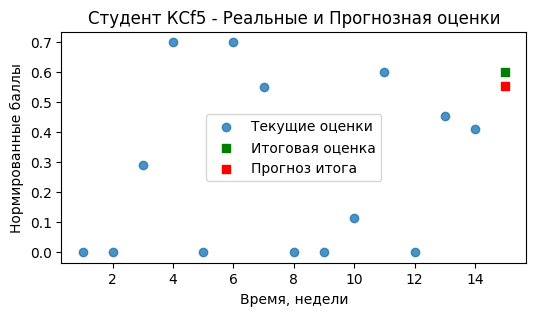

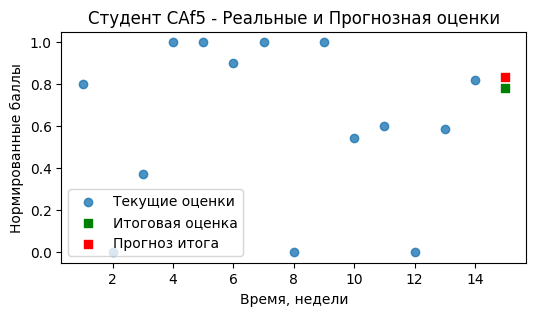

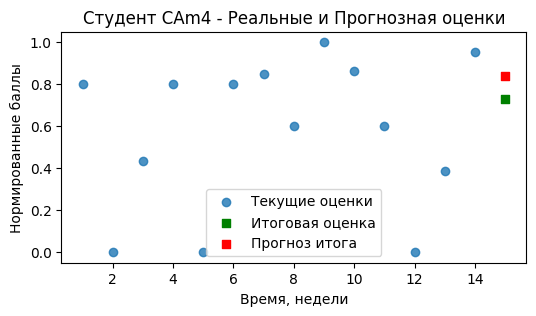

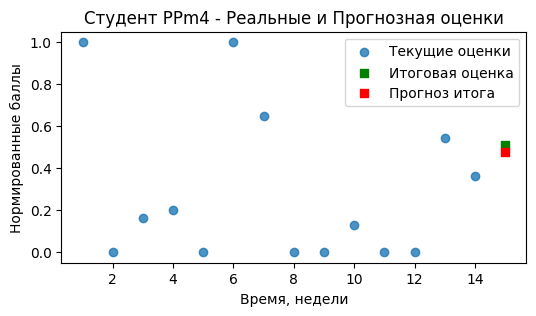

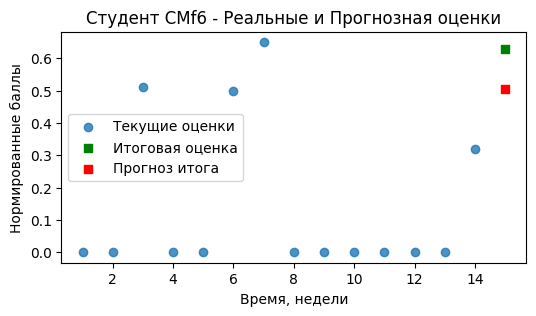

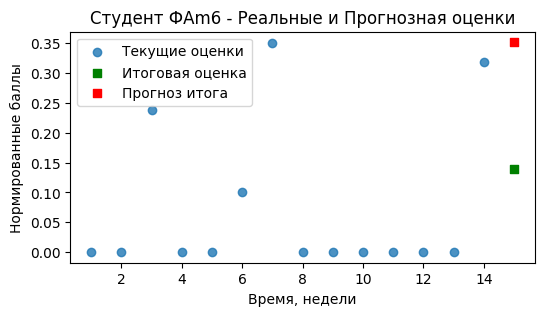

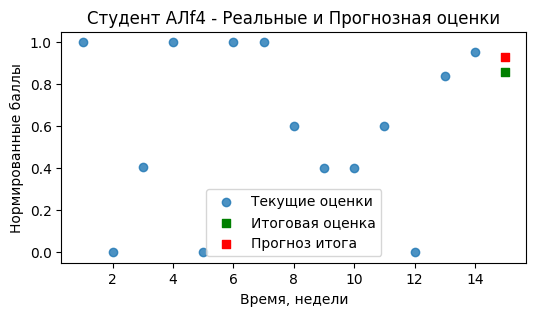

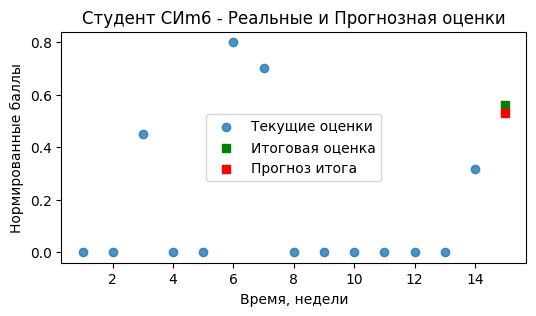

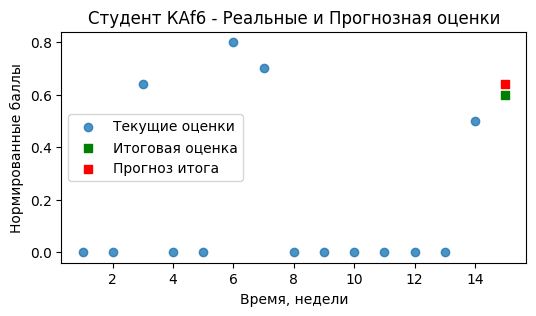

In [12]:
# Разделение данных на обучающий и целевой наборы
X = extended_df.iloc[:, :14]  # данные с оценками от 1 до 15
y = extended_df.iloc[:, 15]  # оценки в столбце 16

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regression_model(X_train, X_test, y_train, y_test)